In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob
from gensim import corpora, models

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\35387\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\35387\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv('tweets_with_sentiment_analysis.csv')

In [6]:
# Define a function to get the sentiment polarity of a text
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


In [7]:
# Define a function to classify the sentiment as positive, negative, or neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [8]:
# Apply the sentiment polarity function on the 'text' column
df['sentiment_polarity'] = df['text'].apply(get_sentiment_polarity)

In [9]:
# Apply the sentiment classification function on the 'sentiment_polarity' column
df['sentiment'] = df['sentiment_polarity'].apply(classify_sentiment)

In [10]:
# Check if the 'sentiment' column exists in the dataframe
if 'sentiment' not in df.columns:
    print("Error: 'sentiment' column not found in the dataframe.")
else:
    # Count the number of tweets with each sentiment
    sentiment_counts = df['sentiment'].value_counts()

C:\Users\35387\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


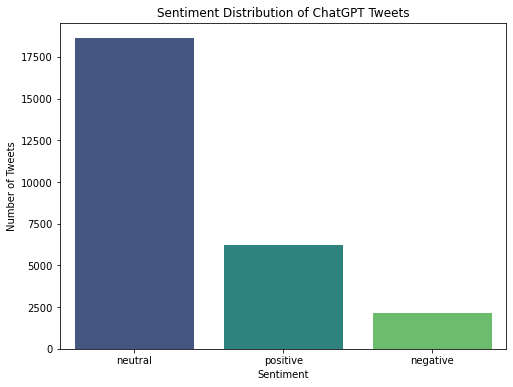

In [11]:
    # Create a bar chart for the sentiment counts
    plt.figure(figsize=(8, 6))
    sns.barplot(sentiment_counts.index, sentiment_counts.values, palette='viridis')
    plt.title('Sentiment Distribution of ChatGPT Tweets')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.show()

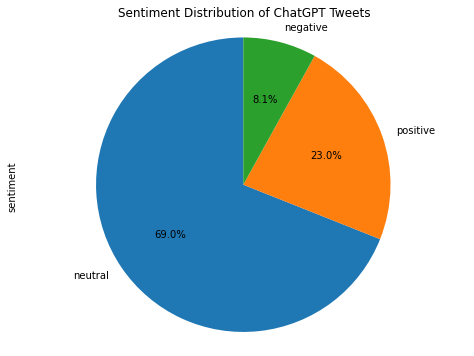

In [12]:
    # Create a pie chart for the sentiment counts
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Sentiment Distribution of ChatGPT Tweets')
    plt.axis('equal')
    plt.show()


In [13]:
# Tokenize words in the 'text' column and remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['text'].apply(lambda x: [word.lower() for word in x.split()])

In [14]:
# Calculate word frequencies
word_freq = Counter()
for _, row in df.iterrows():
    word_freq.update(row['tokens'])

In [15]:
# Display the top 10 most common words
print("Top 10 most common words:")
for word, count in word_freq.most_common(10):
    print(f"{word}: {count}")

Top 10 most common words:
rt: 17770
chatgpt: 12085
the: 7804
to: 6940
a: 6235
of: 4497
and: 4085
is: 3786
de: 3729
ai: 3132


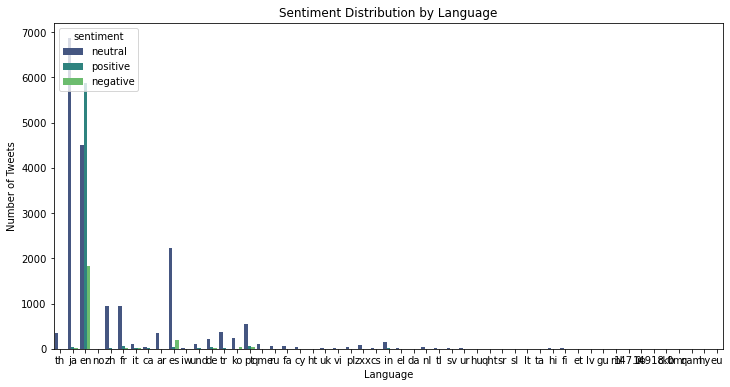

In [16]:
# Visualize sentiment distribution by language
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='lang', hue='sentiment', palette='viridis')
plt.title('Sentiment Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.show()

In [17]:
negative_tweets = df[df['sentiment'] == 'negative']

In [18]:
# Prepare the texts for LDA
texts = list(negative_tweets['tokens'])


In [19]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [20]:
# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20, random_state=42)


In [21]:
# Print the top 5 topics in negative sentiment tweets
print("Top 5 topics in negative sentiment tweets:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}\n")


Top 5 topics in negative sentiment tweets:
Topic 1: 0.032*"chatgpt" + 0.031*"rt" + 0.023*"to" + 0.021*"the" + 0.018*"de" + 0.018*"a" + 0.015*"artificial" + 0.014*"is" + 0.013*"for" + 0.010*"inteligencia"

Topic 2: 0.035*"with" + 0.027*"rt" + 0.021*"and" + 0.019*"chatgpt" + 0.018*"have" + 0.017*"i" + 0.016*"ai." + 0.016*"am" + 0.015*"so" + 0.015*"how"

Topic 3: 0.032*"the" + 0.021*"a" + 0.020*"of" + 0.018*"chatgpt" + 0.017*"rt" + 0.016*"and" + 0.014*"in" + 0.014*"i" + 0.014*"for" + 0.011*"it"

Topic 4: 0.026*"chatgpt" + 0.023*"the" + 0.023*"rt" + 0.016*"to" + 0.016*"is" + 0.014*"you" + 0.012*"that" + 0.011*"ai" + 0.011*"a" + 0.010*"and"

Topic 5: 0.026*"the" + 0.025*"of" + 0.024*"to" + 0.024*"chatgpt" + 0.018*"a" + 0.018*"rt" + 0.018*"and" + 0.016*"ai" + 0.015*"is" + 0.014*"you"



In [22]:
#I understand that the topics generated using LDA can be difficult to interpret.
#The raw output of LDA may not be very meaningful, as it is a statistical model that tries to find underlying patterns in the text data.

In [23]:
# Let's try another approach, the Non-negative Matrix Factorization (NMF), which often yields more interpretable results.

In [24]:
# Filter out the negative sentiment tweets
negative_tweets2 = df[df['sentiment'] == 'negative']


In [25]:
# Prepare the texts for NMF
texts = negative_tweets2['text']

In [26]:
# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)

In [27]:
# Transform the texts into a TF-IDF matrix
tfidf = vectorizer.fit_transform(texts)

In [28]:
# Train the NMF model
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf)

NMF(n_components=5, random_state=42)

In [29]:
# Function to display top words in each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()


In [30]:
# Print the top 5 topics in negative sentiment tweets
print("Top 5 topics in negative sentiment tweets:")
print_top_words(nmf_model, vectorizer.get_feature_names(), 10)

Top 5 topics in negative sentiment tweets:
Topic 1:
don use academic mushtaqbilalphd citations fake instead research exist papers

Topic 2:
jessicard jximze2qeg hooked furby humanity bad start think https chatgpt

Topic 3:
ai tools new just chatgpt rt ocean drop single past

Topic 4:
multiple home finished setting remote 0xgaut table leaving money jobs

Topic 5:
inteligencia artificial la es por que el en presidente petrogustavo



In [31]:
# Tokenize words and remove stopwords for negative tweets
negative_tweets['tokens'] = negative_tweets['text'].apply(word_tokenize)
negative_tweets['tokens'] = negative_tweets['tokens'].apply(lambda words: [word.lower() for word in words if word.isalpha()])
negative_tweets['tokens'] = negative_tweets['tokens'].apply(lambda words: [word for word in words if word not in stop_words])

# Calculate word frequencies
word_freq = Counter()
for index, row in negative_tweets.iterrows():
    word_freq.update(row['tokens'])

# Print the 20 most common words in negative sentiment tweets
print("20 most common words in negative sentiment tweets:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")


<ipython-input-31-9fc898e65b6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['tokens'] = negative_tweets['text'].apply(word_tokenize)
<ipython-input-31-9fc898e65b6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['tokens'] = negative_tweets['tokens'].apply(lambda words: [word.lower() for word in words if word.isalpha()])
<ipython-input-31-9fc898e65b6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

20 most common words in negative sentiment tweets:
chatgpt: 1823
rt: 1453
https: 707
ai: 626
artificial: 321
de: 278
use: 244
la: 192
inteligencia: 178
fake: 163
even: 148
academic: 142
new: 141
tools: 137
mushtaqbilalphd: 137
citations: 123
think: 119
que: 115
intelligence: 114
using: 111


In [33]:
#Here are some observations from the list of common words:

#"chatgpt", "ai", "artificial", "intelligence": These words are expected since the tweets are about ChatGPT and AI-related discussions.
#"fake", "academic", "citations", "mushtaqbilalphd": These words suggest that there might be some negative discussions around the authenticity or credibility of information related to ChatGPT, possibly in the context of academic research.
#"use", "using", "tools", "new": These words indicate that some tweets are about the usage of ChatGPT as a tool or its integration with other tools.


In [ ]:
# Export the dataset with sentiment analysis results to a new CSV file
df.to_csv('tweets_with_sentiment_analysis.csv', index=False)